In [6]:
import relaxation
import matplotlib.pyplot as plt
import numpy as np

# Test1

249


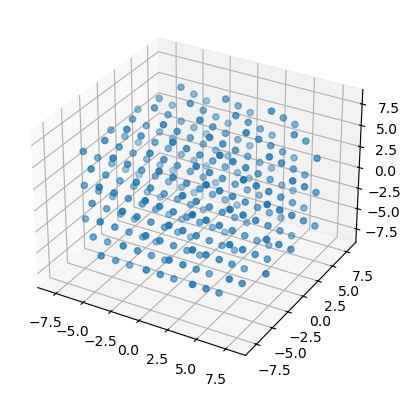

In [9]:
NP = relaxation.nanoparticle()
NP.set_gold_lattice_structure()

R = 10 # [nm]
NP.create_sphere(R)
print(NP.N)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(NP.xs, NP.ys, NP.zs)
plt.show()

# Test 2

In [12]:
NP = relaxation.nanoparticle()
NP.set_gold_lattice_structure()
R = 10 # [nm]
NP.create_sphere(R)
print(NP.N)

NP.get_neighbour_list_automatic(second = True)

def f(x):
    pow1 = 6
    eps = 1
    σ = 2**(-2/pow1)*NP.a0/np.sqrt(2)
    return relaxation.LJ_force(x, eps, σ, pow1)

def ϕ(x):
    pow1 = 6
    eps = 1
    σ = 2**(-2/pow1)*NP.a0/np.sqrt(2)
    return relaxation.LJ_pot(x, eps, σ, pow1)

NP.force = f
NP.potential = ϕ
NP.hydrostatic = 0

249


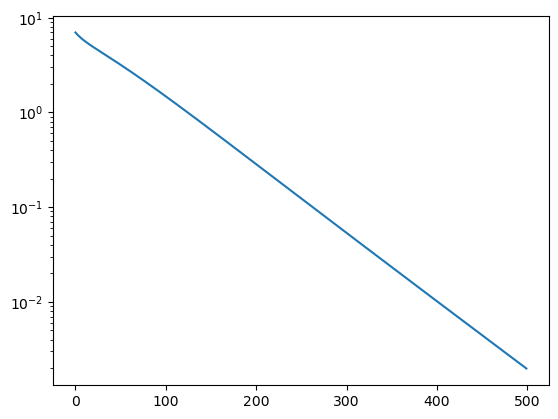

In [13]:

orig_positions = NP.positions.copy()
difs = NP.relax(niter = 500, dt=0.01)
positions = NP.positions.copy()
fig, axs = plt.subplots()
axs.plot(difs)
axs.set_yscale('log')
plt.show()

In [14]:
dyn_matrix = NP.get_dyn_matrix()
A_list, B_list, A_matrix, B_matrix = NP.get_AB()

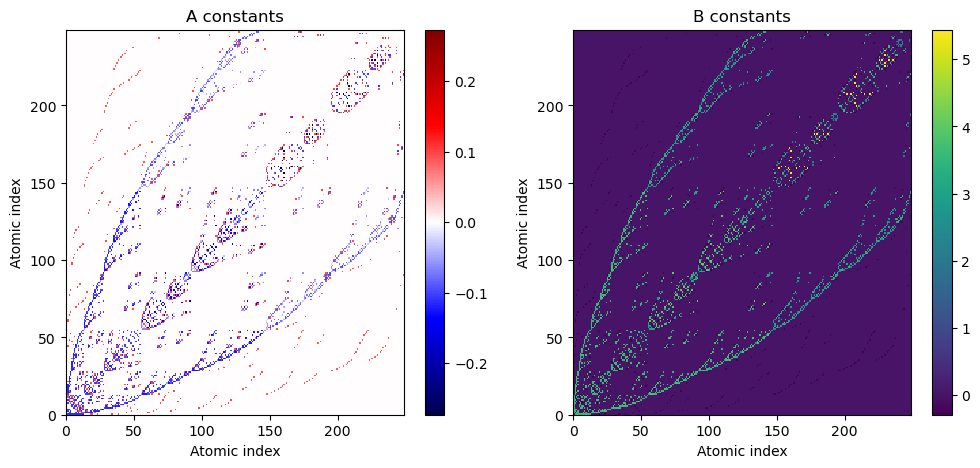

In [15]:

Alim = max(abs(A_matrix.flatten()))
fig, axs = plt.subplots(1,2,figsize=(12,5))
handleA = axs[0].pcolormesh(A_matrix, cmap="seismic", vmin=-Alim, vmax=Alim)
handleB = axs[1].pcolormesh(B_matrix, cmap="viridis")
plt.colorbar(handleA, ax=axs[0])
plt.colorbar(handleB, ax=axs[1])
axs[0].set_title("A constants")
axs[1].set_title("B constants")
for ax in axs:
    ax.set_xlabel("Atomic index")
    ax.set_ylabel("Atomic index")
plt.show()

In [16]:
cmap = matplotlib.colormaps['Spectral']

for matrix, label in zip([A_matrix, B_matrix], ["A constants","B constants"]):
    print(label)
    
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,2,1, projection='3d')
    ax2 = fig.add_subplot(1,2,2, projection='3d')
    xs = np.linspace(0,1,100)
    
    Amax = np.max(matrix)
    Amin = np.min(matrix)
    
    for i,Ri in enumerate(positions):
        num_neighs = NP.num_neigh_list[i]
        Ri0 = orig_positions[i]
        
        for neigh in range(num_neighs):
            j = NP.neigh_list[i,neigh]
            Rj = positions[j]
            Rj0 = orig_positions[j]
            
            A = matrix[i,j]
            xs = [Rj[0], Ri[0]]
            ys = [Rj[1], Ri[1]]
            zs = [Rj[2], Ri[2]]
            val = (A-Amin)/(Amax-Amin)
    
            # Check if first or second nearest neighbour based on their initial configuration
            if np.linalg.norm(Rj0 - Ri0) < NP.a*1.1: 
                ax1.plot(xs, ys, zs, c=cmap(val), alpha=0.5, linewidth=2)
            else:
                ax2.plot(xs, ys, zs, c=cmap(val), alpha=0.5, linewidth=2)
        
        # break
    
    ax1.set_title("First nearest neighbours")
    ax2.set_title("Second nearest neighbours")
    
    norm = matplotlib.colors.Normalize(vmin=Amin, vmax=Amax)
    fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax2)
    
    plt.show()

NameError: name 'matplotlib' is not defined